<a href="https://colab.research.google.com/github/jgoncsilva/Classes_IronHack/blob/master/scipy_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation: https://docs.scipy.org/doc/

In [ ]:
# check if you have library
import scipy

In [ ]:
# import additional libraries
import numpy as np
import matplotlib.pyplot as plt

## stats module

Documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
from scipy import stats

np.random.seed = 29

arr = np.random.randint(34, size = (50))
arr

array([ 1, 15,  0,  6,  4,  5, 17, 26,  1, 22, 10,  0,  8,  8, 21,  8, 31,
       23,  6, 32,  7, 31, 15, 21, 19, 17, 17, 11, 10, 27, 17, 25, 18,  6,
        4,  0, 30, 30, 29, 10,  3, 25,  7, 16,  4,  3, 31,  5, 21,  7])

In [ ]:
# calc mode
stats.mode(arr, axis = 0)

ModeResult(mode=array([17]), count=array([4]))

In [ ]:
stats.describe(arr)

DescribeResult(nobs=50, minmax=(0, 32), mean=14.2, variance=101.83673469387755, skewness=0.3035020507473011, kurtosis=-1.2116564993714884)

In [ ]:
stats.tstd(arr) == (stats.tvar(arr)) ** 0.5

True

In [ ]:
f"The kurtosis value is {stats.kurtosis(arr)}, so it's almost gaussian"

"The kurtosis value is -1.2116564993714884, so it's almost gaussian"

## linear algebra module

In [ ]:
from scipy import linalg

np.random.seed = 29

A = np.random.randint(9, size = (3, 3))
A

array([[7, 5, 1],
       [2, 2, 0],
       [1, 8, 1]])

In [ ]:
# calculate inverse
B = linalg.inv(A) 

In [ ]:
np.dot(A,B)

array([[1.00000000e+00, 0.00000000e+00, 1.66533454e-16],
       [5.55111512e-17, 1.00000000e+00, 2.77555756e-17],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
b = np.array([[4],[5],[9]])

# calculate matrix dot product 
linalg.inv(A).dot(b)

array([[ 0.27777778],
       [ 2.22222222],
       [-9.05555556]])

In [ ]:
from scipy.linalg import solve

a = np.array([[5, 6], [2, 4]])
b = np.array([10, 8])
x = solve(a, b)
x

array([-1. ,  2.5])

## interpolate module

x is  [ 0  1  2  3  4  5  6  7  8  9 10]
y is  [ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
  0.96017029  0.75390225 -0.14550003 -0.91113026 -0.83907153]


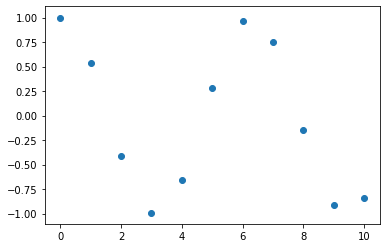

In [ ]:
from scipy.interpolate import interp1d

# We are creating a dataset where the x values are numbers 0 through 10 
# and the y values are the cosine of the x values
x = np.arange(0, 11, 1)
y = np.cos(x)
print('x is ', x)
print('y is ', y)
plt.scatter(x, y)

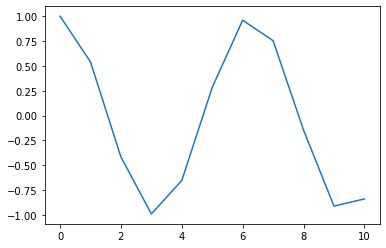

In [ ]:
# We generate an interpolation function and then apply that function to the new data and plot
f = interp1d(x, y) #,'quadratic') to have a quadratic polynomial to fit
xnew = np.arange(0, 10.25, 0.25)
plt.plot(xnew, f(xnew))

**Splines** : spline interpolation is a form of interpolation where the interpolant is a special type of piecewise polynomial called a spline. Spline interpolation is often preferred over polynomial interpolation because the interpolation error can be made small even when using low degree polynomials for the spline. Originally, spline was a term for elastic rulers that were bent to pass through a number of predefined points ("knots").

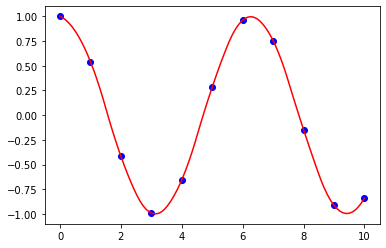

In [ ]:
t, c, k = scipy.interpolate.splrep(x, y, s=0, k=2) ## interpolate based on values. Output: knots, coefficients, order

x_spl = np.linspace(x.min(), x.max(), 100)   ## new x values in the range (min_x, max_x)
spline = scipy.interpolate.BSpline(t, c, k)  ## create the model of the curve with the values from interpolation

plt.plot(x, y, 'bo', label='Original points')
plt.plot(x_spl, spline(x_spl), 'r', label='bspline model')
plt.show()